# Исследование продаж компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Содержание**<a id='toc0_'></a>    
- 1. [Изучение общей информации о данных](#toc1_)    
- 2. [Предобработка данных](#toc2_)    
  - 2.1. [Замена названий столбцов](#toc2_1_)    
  - 2.2. [Замена типов данных](#toc2_2_)    
  - 2.3. [Обработка пропусков](#toc2_3_)    
  - 2.4. [Добавление столбцов](#toc2_4_)    
- 3. [Исследовательский анализ данных](#toc3_)    
  - 3.1. [Определение актуального периода](#toc3_1_)    
  - 3.2. [Прибыльность платформ](#toc3_2_)    
  - 3.3. [Связь отзывов и продаж](#toc3_3_)    
  - 3.4. [Распределение и прибыльность жанров](#toc3_4_)    
- 4. [Портрет пользователя каждого региона](#toc4_)    
- 5. [Проверка гипотез](#toc5_)    
- 6. [Общий вывод](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Изучение общей информации о данных](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Откроем файл с данными.

In [2]:
try:
    raw_data = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    raw_data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Общая информация о данных

In [3]:
raw_data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
raw_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Построим гистограммы  по столбцам.

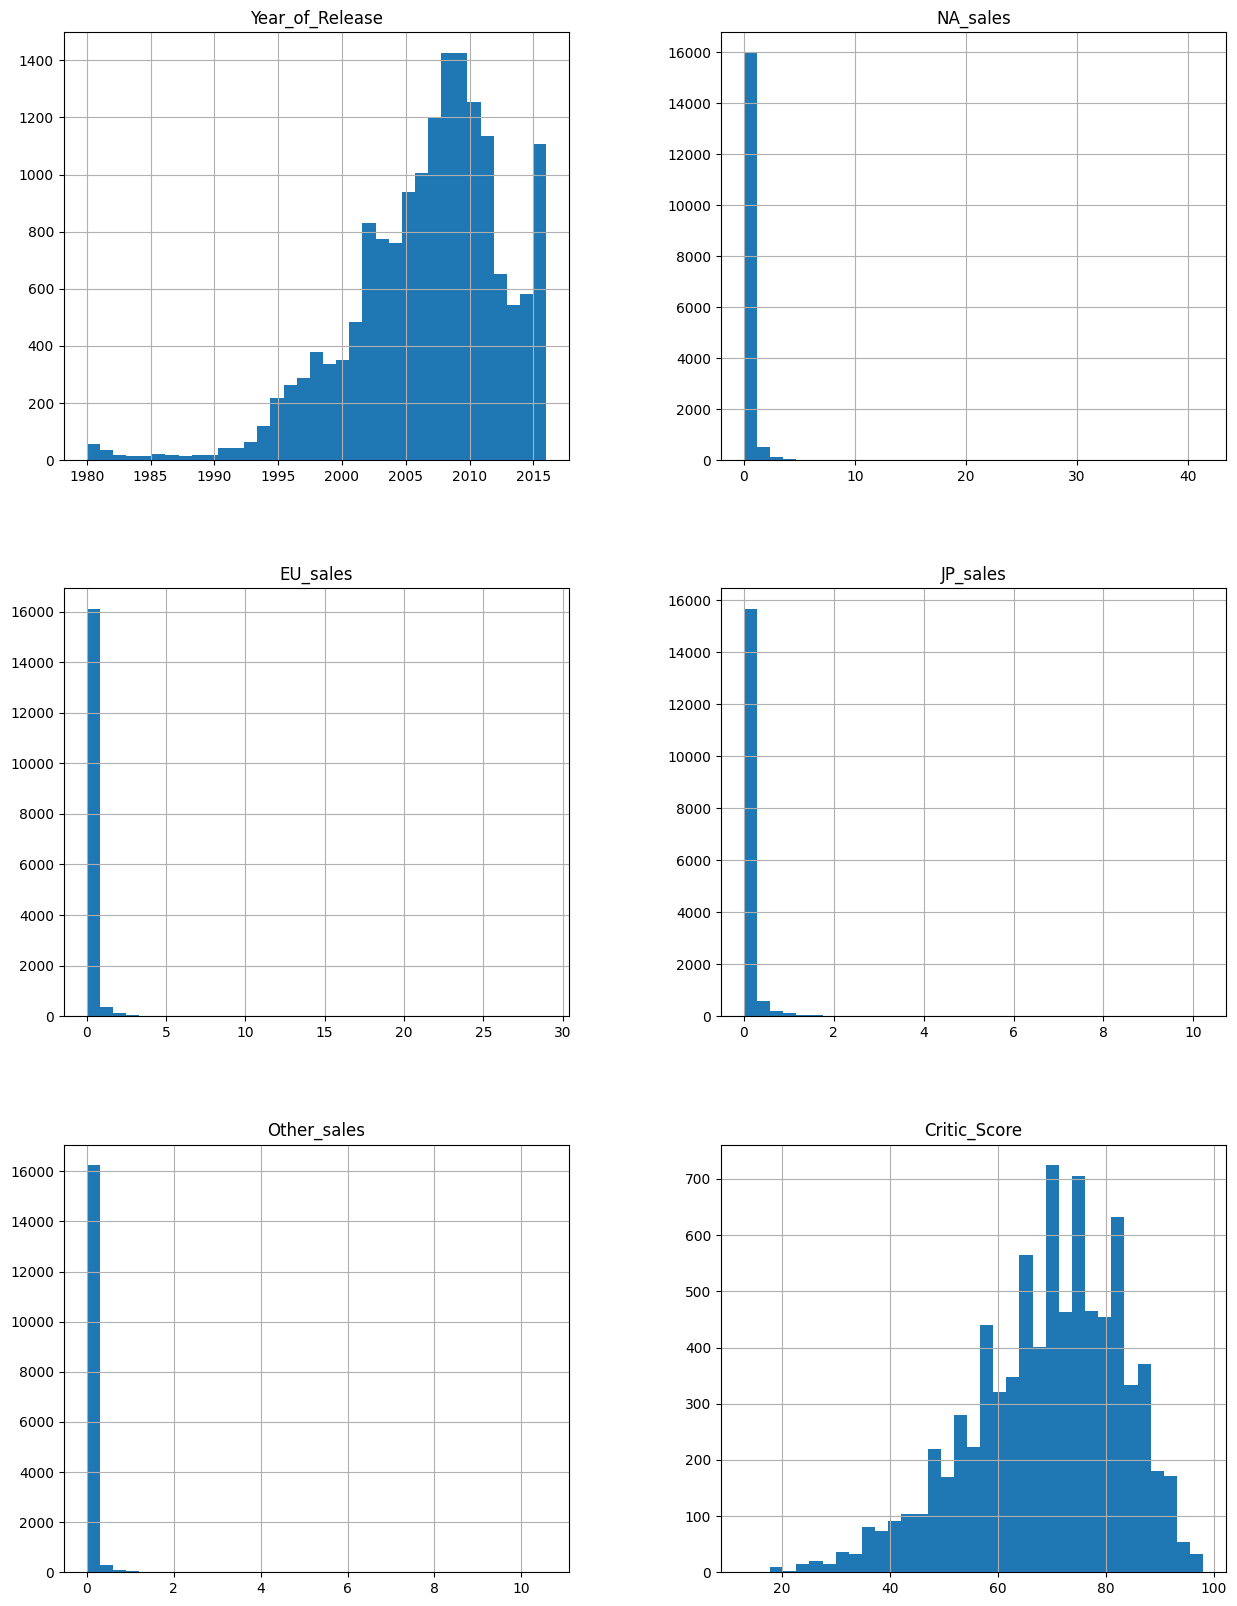

In [6]:
raw_data.hist(bins=35, figsize=(15, 20));

 **Вывод по разделу 1:**

В датасете 11 столбцов, содержащих различную информацию о вышедших играх.
<br>6 столбцов содержат пропуски, по возможности их необходимо заполнить.
<br>2 столбца нуждаются в  изменении типа данных. В некоторых столбцах выделяются крупные значения.

## 2. <a id='toc2_'></a>[Предобработка данных](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Замена названий столбцов](#toc0_)

Приведём названия всех столбцов книжнему регистру.

In [7]:
data = raw_data.copy()
data.columns = data.columns.str.lower()

### 2.2. <a id='toc2_2_'></a>[Замена типов данных](#toc0_)

Год выпуска должен быть целочисленным типом.

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

<div class='alert alert-info'>
    Учитывая, что пропусков в столбце с годом выхода относительно немного, удалим их.
</div>

In [9]:
data = data.dropna(subset=['year_of_release']).reset_index()

Будем считать что значение `tbd` (to be determined) в стоблце с пользовательскими оценками означает отсутствие оценки (скорее всего слишком мало оценок). Заменим его на `NaN`, затем изменим тип столбца на `float`.

In [10]:
data.user_score.replace('tbd', np.nan, inplace=True)
data['user_score'] = data['user_score'].astype(float)

### 2.3. <a id='toc2_3_'></a>[Обработка пропусков](#toc0_)

Два пропуска в столбцах с именем игры и жанром можно отбросить (их мало и они выпущены довольно давно).

In [11]:
display(data.query('name.isna() or genre.isna()'))
data.dropna(subset=['name', 'genre'], inplace=True)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class='alert alert-info'>
    Пропуски в возрастной категории игр заполним значением <b>undef</b>.
</div>

In [12]:
data['rating'].fillna('undef', inplace=True)

В тех строках, где пропущены рейтинги пользователей и критиков, попробуем найти связь этих показателей с годом выпуска, платформой и жанром игры.

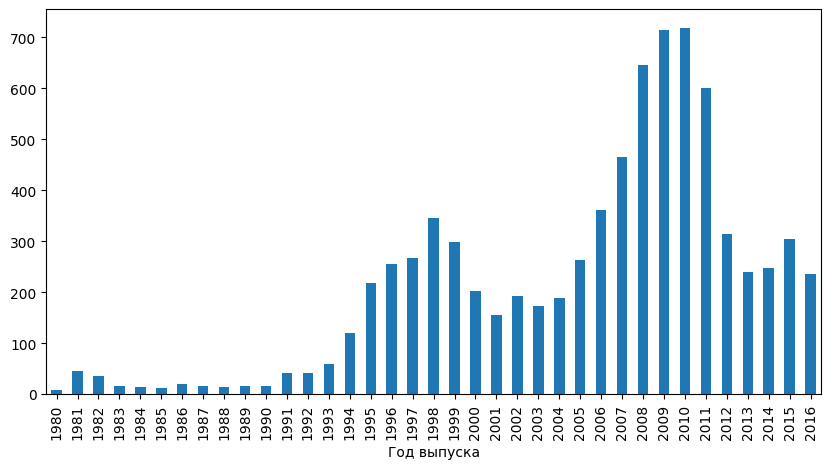

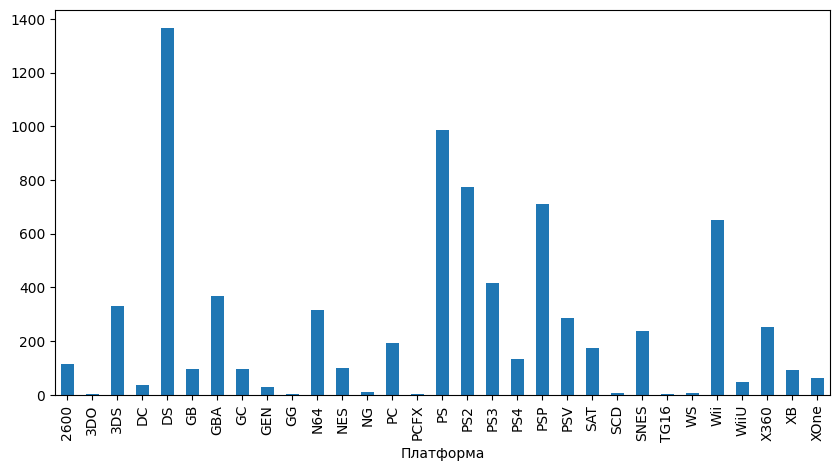

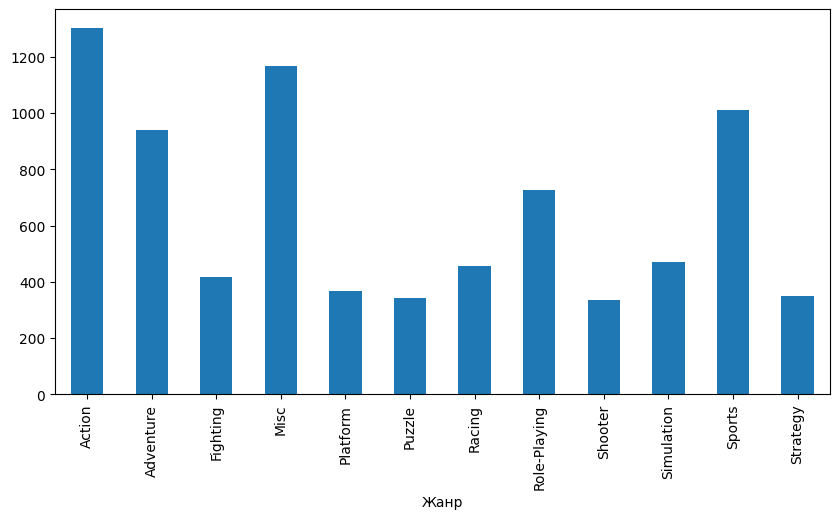

In [13]:
columns = ['year_of_release', 'platform', 'genre']
columns_names = ['Год выпуска', 'Платформа', 'Жанр']

for col, col_name in zip(columns, columns_names):
    (data
        .query('critic_score.isna() and user_score.isna()')[col]
        .value_counts()
        .sort_index()
        .plot(kind='bar', figsize=(10, 5))
        .set(xlabel=col_name))
    plt.show()

Заметим, что отсутствие рейтинга не зависит от рассмотренных показателей и, скорее всего, является технической ошибкой при выгрузке данных (или же данные просто неполные).

### 2.4. <a id='toc2_4_'></a>[Добавление столбцов](#toc0_)

Добавим столбец с общими продажами игр.

In [14]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Вывод по разделу 2:**

Заменены названия разделов, типы данных в некоторых столбцах, добавлен столбец с общими продажами; большая часть пропусков осталась как есть, некоторые удалены.

## 3. <a id='toc3_'></a>[Исследовательский анализ данных](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Определение актуального периода](#toc0_)

Для начала рассмотрим сколько игр выходило в разные годы.

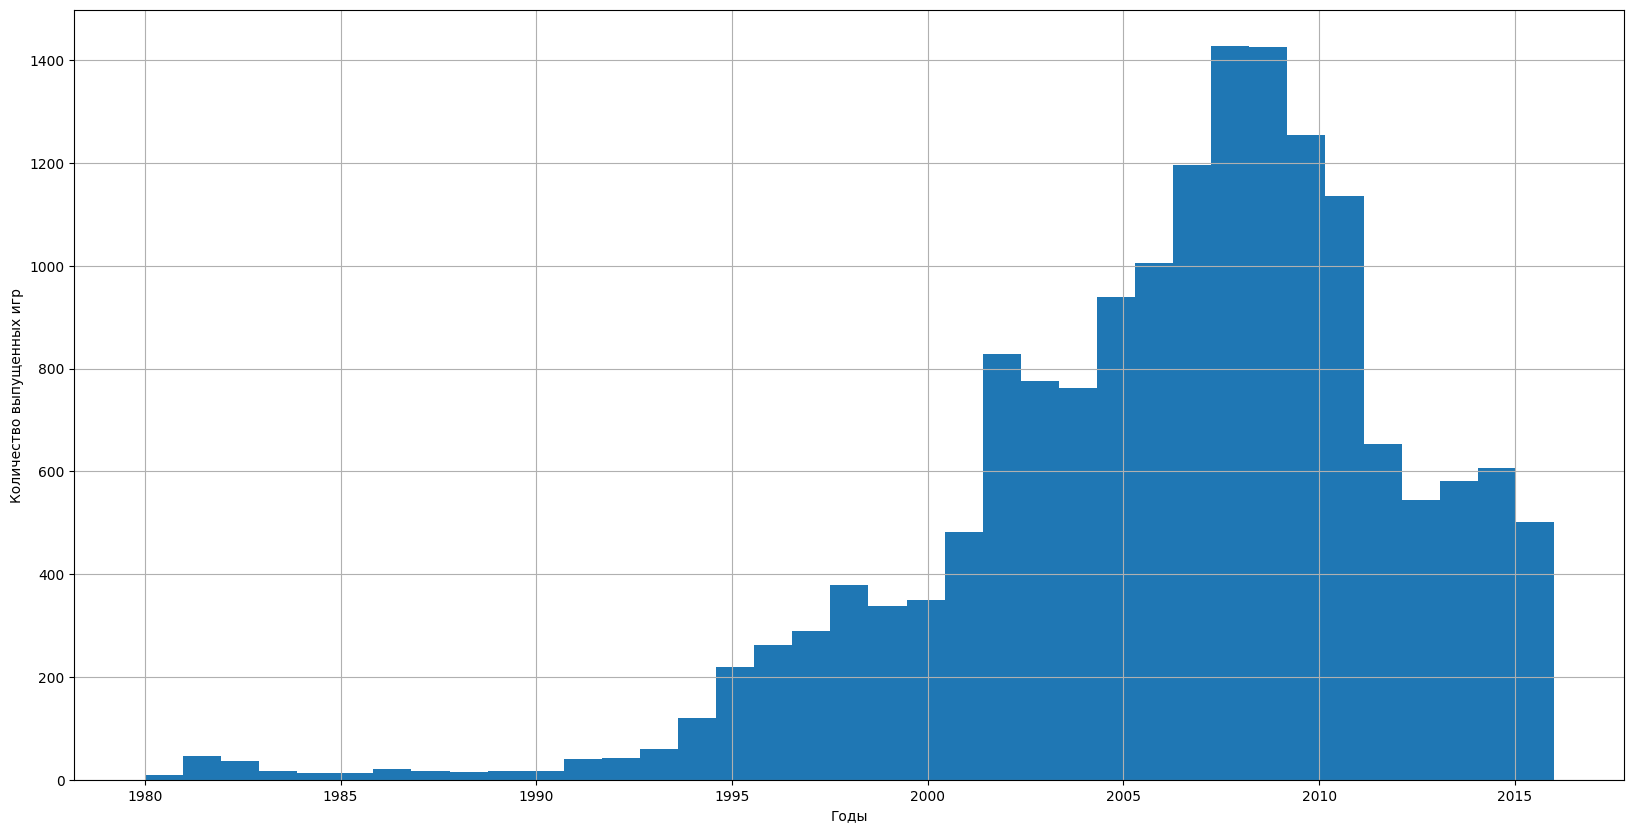

In [15]:
data.year_of_release.hist(bins=37, figsize=(20, 10))\
    .set(ylabel='Количество выпущенных игр', xlabel='Годы');

Заметим, что до 2000 года выходило довольно немнго игр (до 400 в год), а до 1995 - в пределах 100 игр в год.

Найдём теперь платформы с наибольшими суммарными продажами.

In [16]:
top_sales_platforms = (data
     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
     .sort_values(by='total_sales', ascending=False)
)
top_sales_platforms.head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Для 5 первых платформ построим распределение продаж по годам.

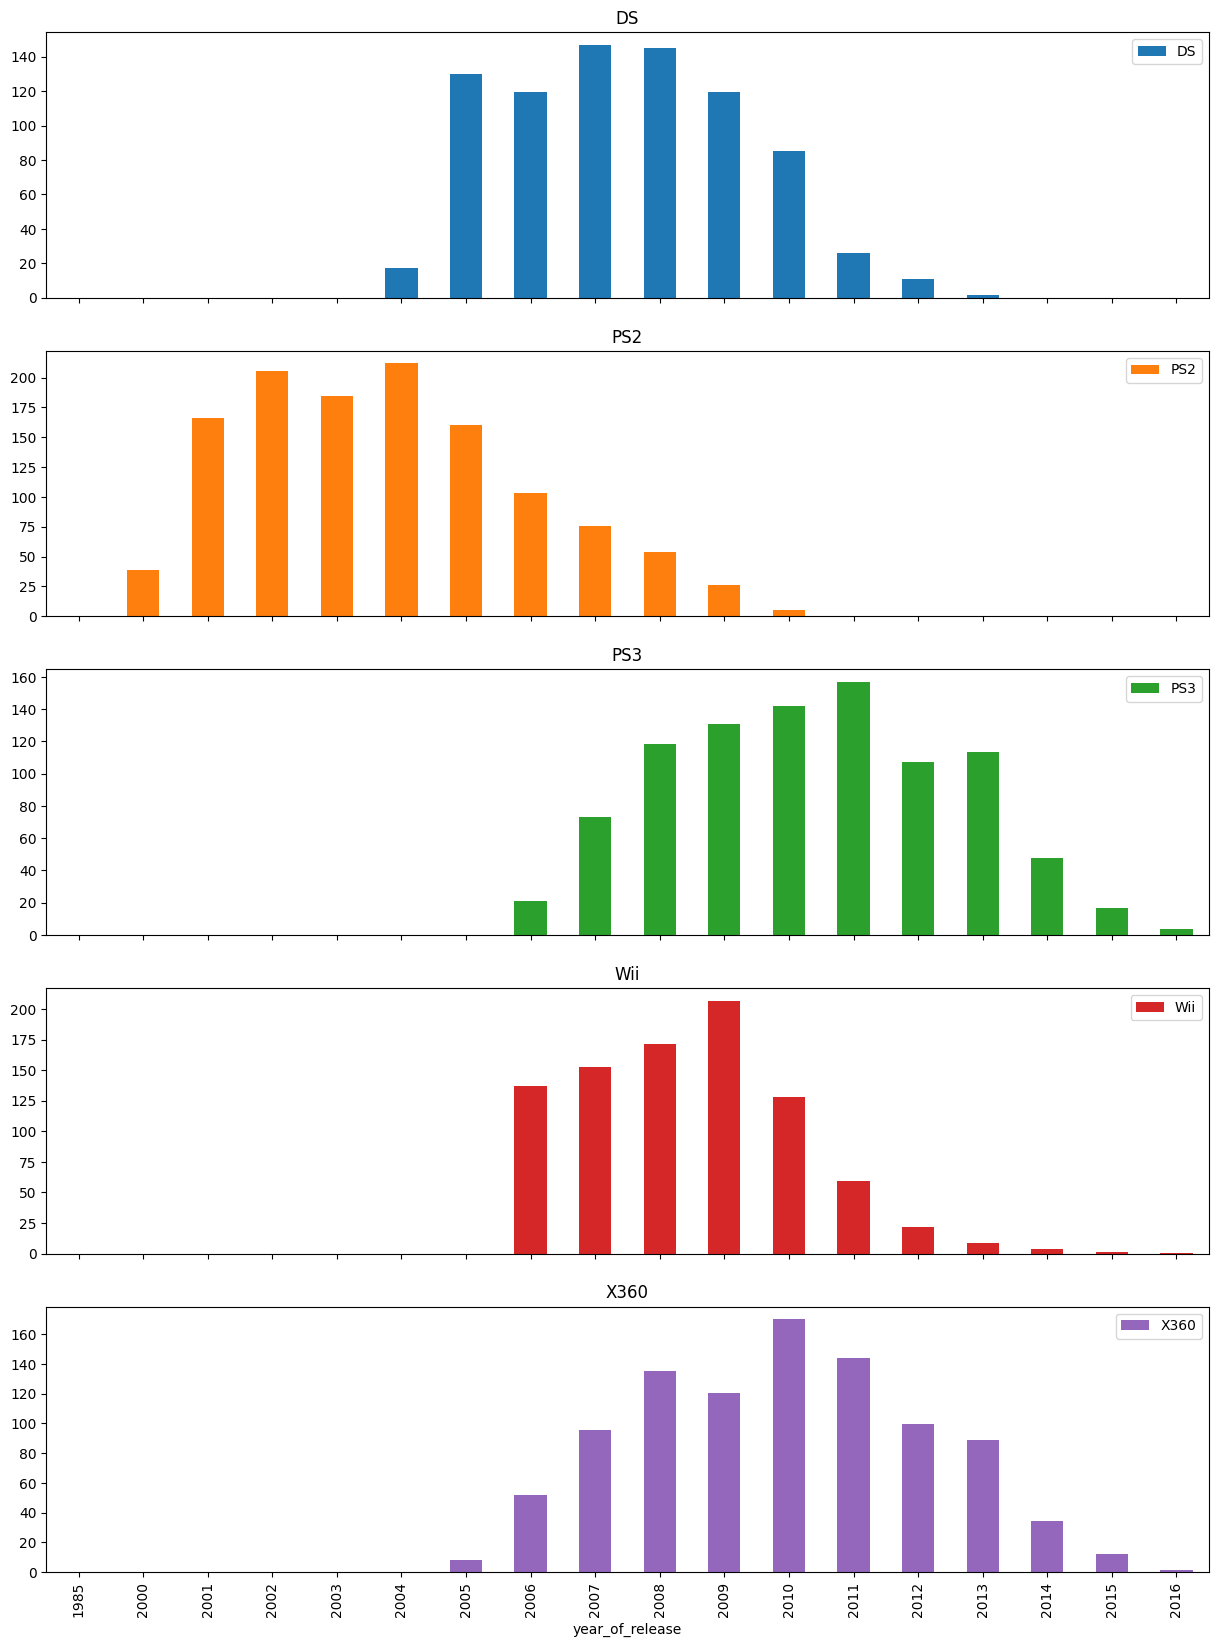

In [17]:
(data
     .query('platform in @top_sales_platforms.head().index')
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
     .plot.bar(subplots=True, figsize=(15, 20))
);

Актуальным периодом для дальнейшего прогноза будем считать 2012-2016 годы, т.е. последние 5 лет. Данные за предыдущие годы учитывать не будем.

In [18]:
actual_data = data.query('2012 <= year_of_release')

### 3.2. <a id='toc3_2_'></a>[Прибыльность платформ](#toc0_)

Чтобы определить потенциально прибыльные платформы, построим распределения продаж за актуальный период.

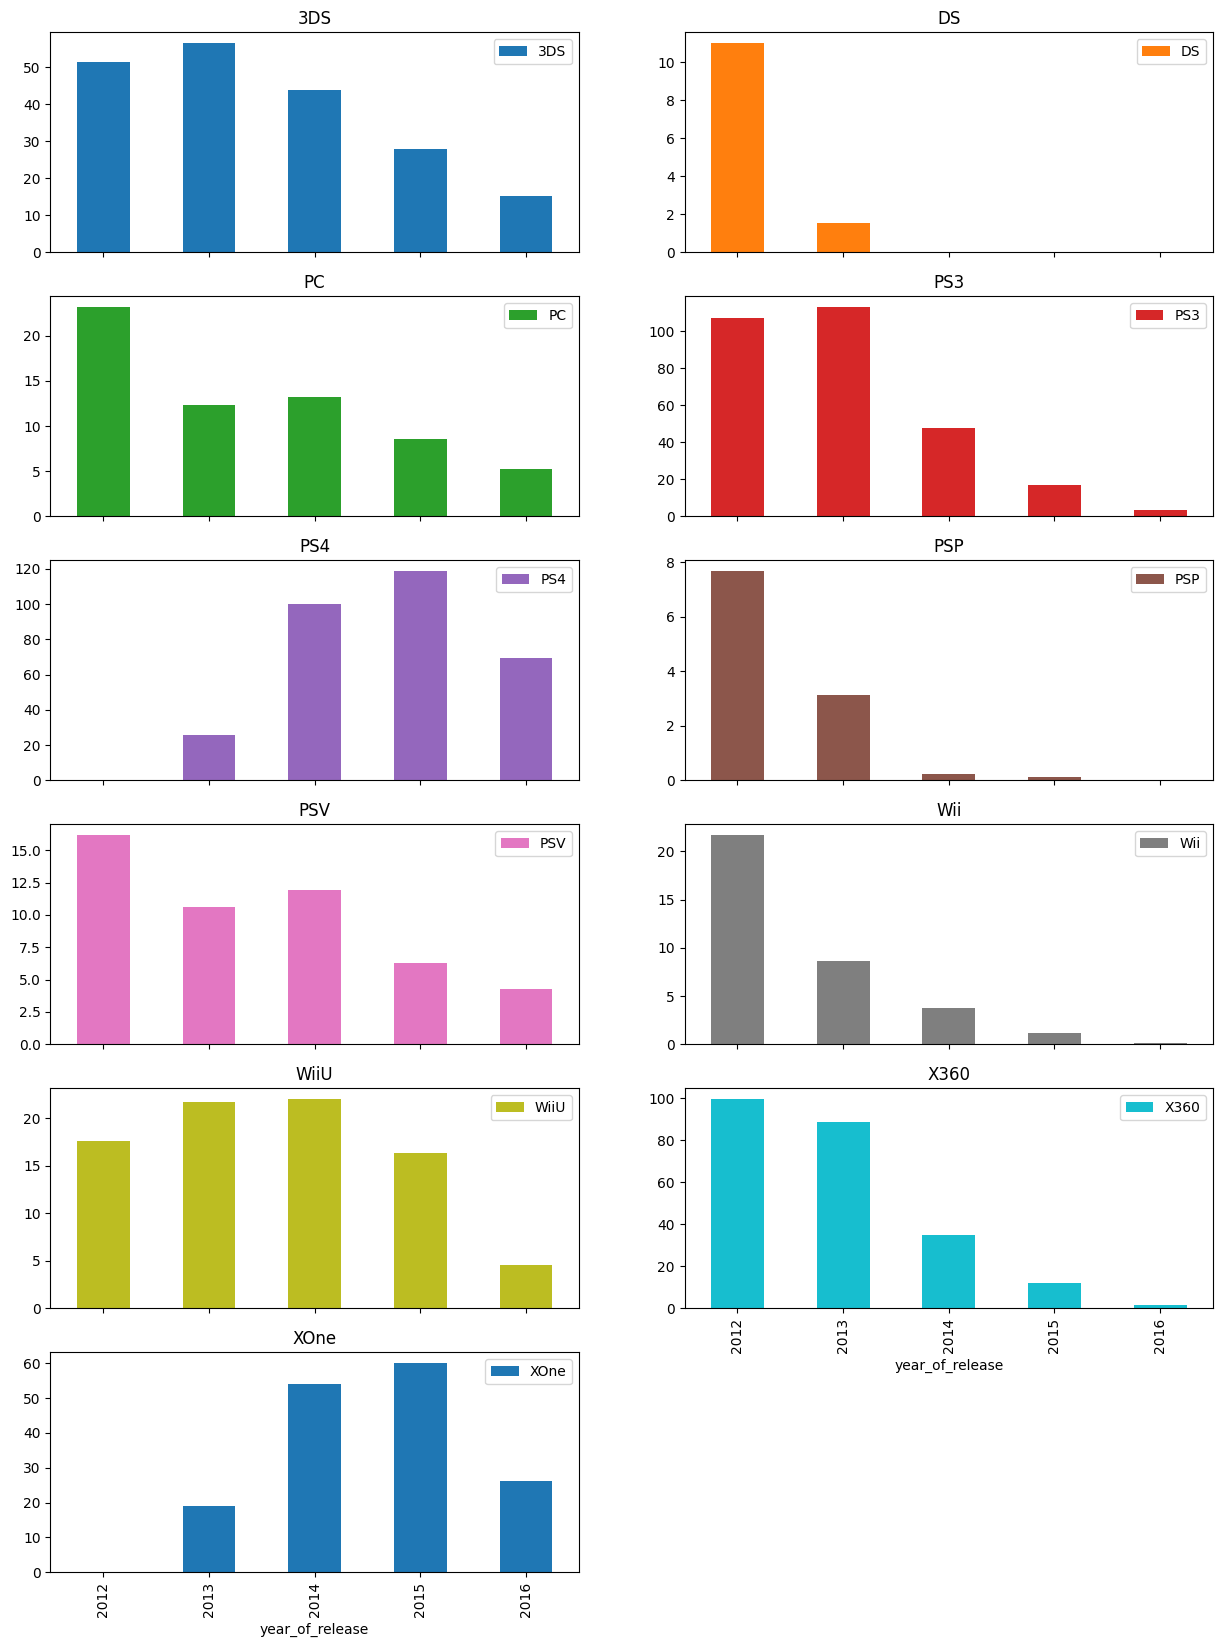

In [19]:
(actual_data
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
     .plot.bar(subplots=True, figsize=(15, 20), layout=(6, 2))
);

Учитывая, что данные за 2016 год неполные, можно сказать, что у большинства платформ продажи падают. При этом продажи игр для XOne и PS4 растут, эти платформы - наиболее потенциально прибыльные.

Построим теперь "ящик с усами" по продажам игр на каждой платформе (учитывая отдельные большие значения, ограничим ось у от 0 до 3 млн. продаж).

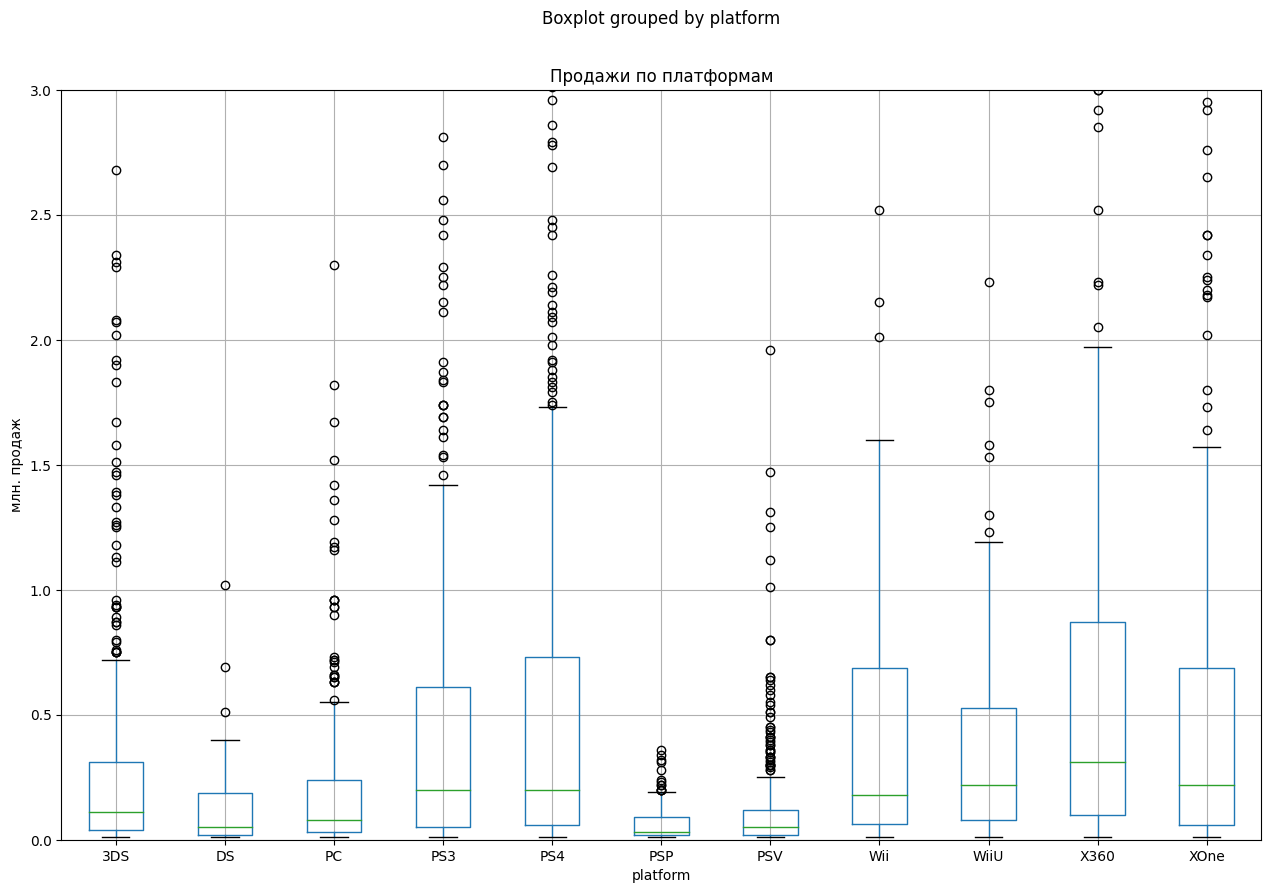

In [20]:
actual_data.boxplot(column='total_sales', by='platform', figsize=(15,10))\
    .set(title='Продажи по платформам', ylabel='млн. продаж', ylim=(0, 3));

Медиана по продажам колеблется от 0,1 до 0,3 млн. на разных платформах, причём на каждой из них есть игры, получившие большую популярность - их продажи выходят за границы межквартильного размаха.
Больше всего прибыльных игр вышло на платформах Wii, PS4, X360 и XOne.

### 3.3. <a id='toc3_3_'></a>[Связь отзывов и продаж](#toc0_)

Попробуем найти взаимосвязь продаж игр с отзывами критиков и пользователей на платформе X360. Для этого построим соответствующие диаграммы рассеяния и корреляционную матрицу.

,critic_score,user_score,total_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.006164
total_sales,0.360573,0.006164,1.000000


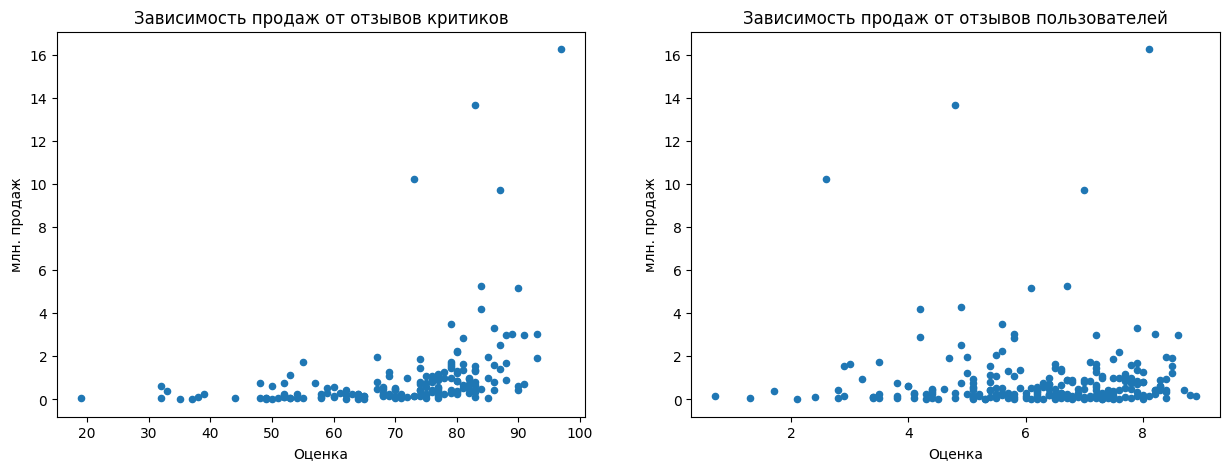

In [21]:
x360_data = actual_data.query('platform == "X360"')
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

x360_data.plot.scatter(x='critic_score', y='total_sales', ax=ax[0])\
    .set(title='Зависимость продаж от отзывов критиков', xlabel='Оценка', ylabel='млн. продаж')
    
x360_data.plot.scatter(x='user_score', y='total_sales', ax=ax[1])\
    .set(title='Зависимость продаж от отзывов пользователей', xlabel='Оценка', ylabel='млн. продаж');

# Корреляционная матрица выбранных столбцов
x360_data[['critic_score', 'user_score', 'total_sales']].corr()

Между отзывами критиков и продажами есть слабая линейная связь, при этом практически все популярные игры имеют высокий рейтинг критиков. Что касается отзывов пользователей, то для большинства игр высокий рейтинг не говорит о высоких продажах, при этом есть отдельные прибыльные игры с невысоким и даже низким рейтингом.

Проделаем то же самое для других платформ.

critic_score  user_score  total_sales
platform                                                    
3DS      critic_score      1.000000    0.722762     0.320803
         user_score        0.722762    1.000000     0.197583
         total_sales       0.320803    0.197583     1.000000
DS       critic_score           NaN         NaN          NaN
         user_score             NaN    1.000000     0.882709
         total_sales            NaN    0.882709     1.000000
PC       critic_score      1.000000    0.432587     0.237243
         user_score        0.432587    1.000000    -0.121867
         total_sales       0.237243   -0.121867     1.000000
PS3      critic_score      1.000000    0.539456     0.331497
         user_score        0.539456    1.000000    -0.005144
         total_sales       0.331497   -0.005144     1.000000
PS4      critic_score      1.000000    0.557654     0.406568
         user_score        0.557654    1.000000    -0.031957
         total_sales       0.406568   -0.031957     1.000000
PSP      critic_score           NaN         NaN          NaN
         user_score             NaN    1.000000    -0.802302
         total_sales            NaN   -0.802302     1.000000
PSV      critic_score      1.000000    0.699199     0.094488
         user_score        0.699199    1.000000    -0.004339
         total_sales       0.094488   -0.004339     1.000000
Wii      critic_score      1.000000    0.816295    -0.424341
         user_score        0.816295    1.000000     0.296197
         total_sales      -0.424341    0.296197     1.000000
WiiU     critic_score      1.000000    0.770080     0.348380
         user_score        0.770080    1.000000     0.400219
         total_sales       0.348380    0.400219     1.000000
X360     critic_score      1.000000    0.557352     0.360573
         user_score        0.557352    1.000000     0.006164
         total_sales       0.360573    0.006164     1.000000
XOne     critic_score      1.000000    0.472462     0.416998
         user_score        0.472462    1.000000    -0.068925
         total_sales       0.416998   -0.068925     1.000000

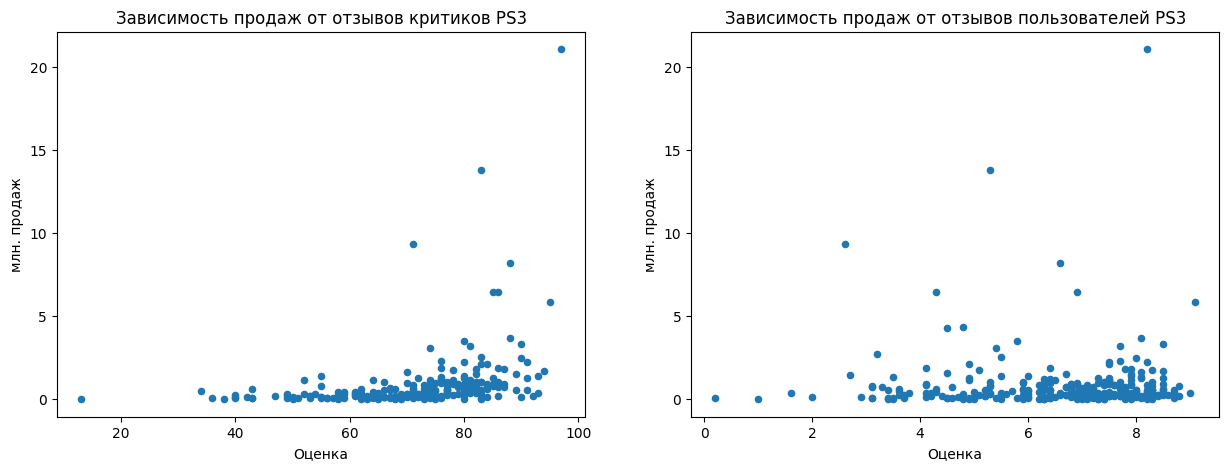

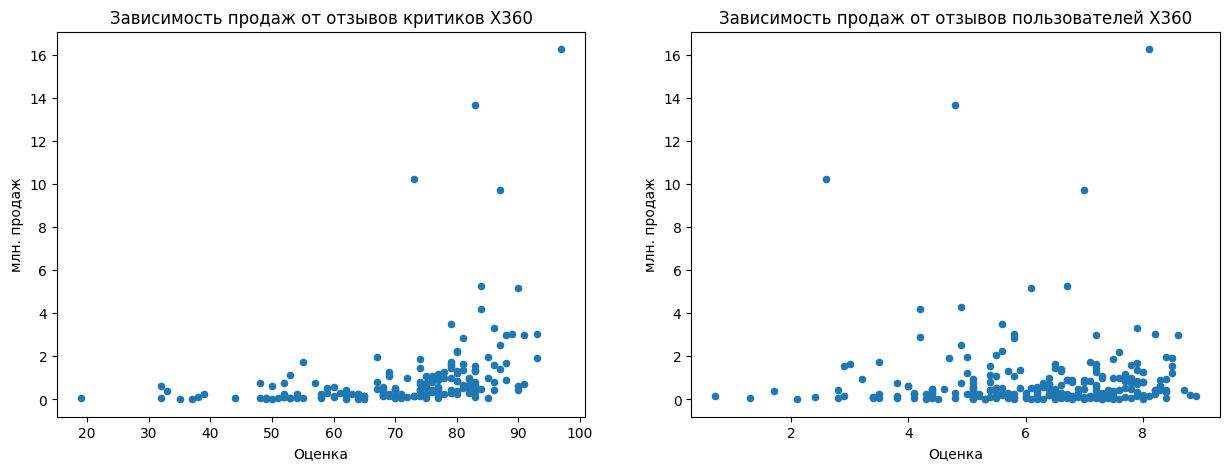

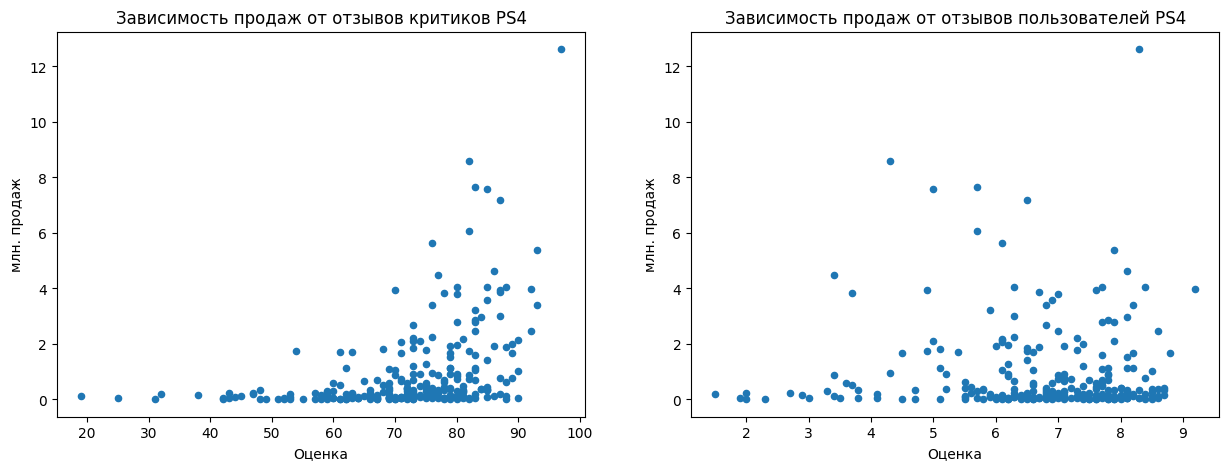

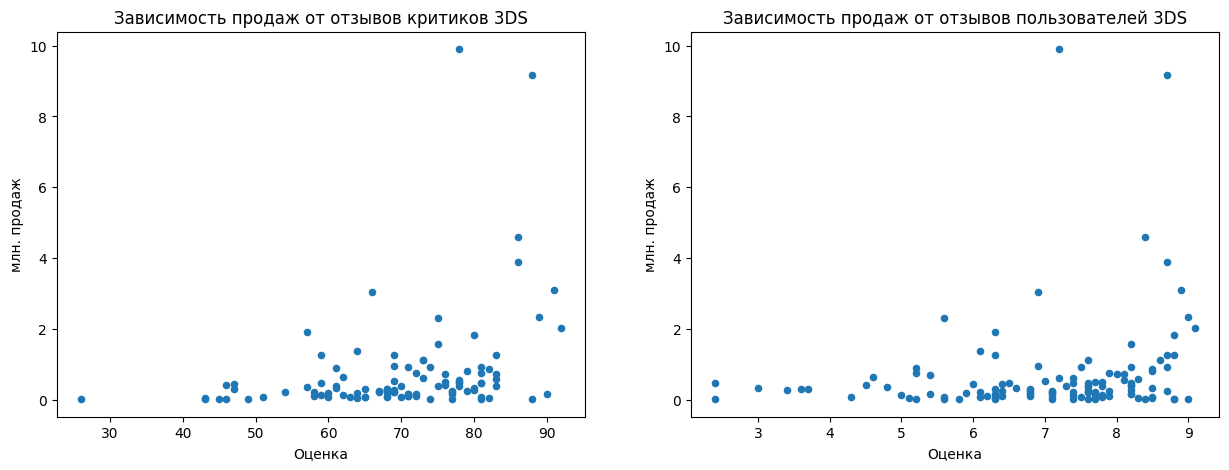

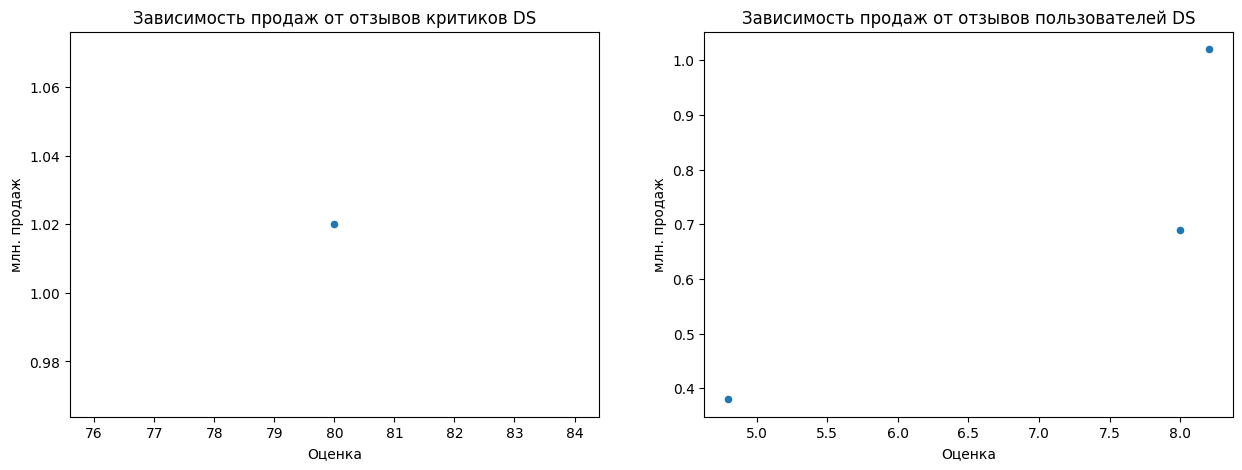

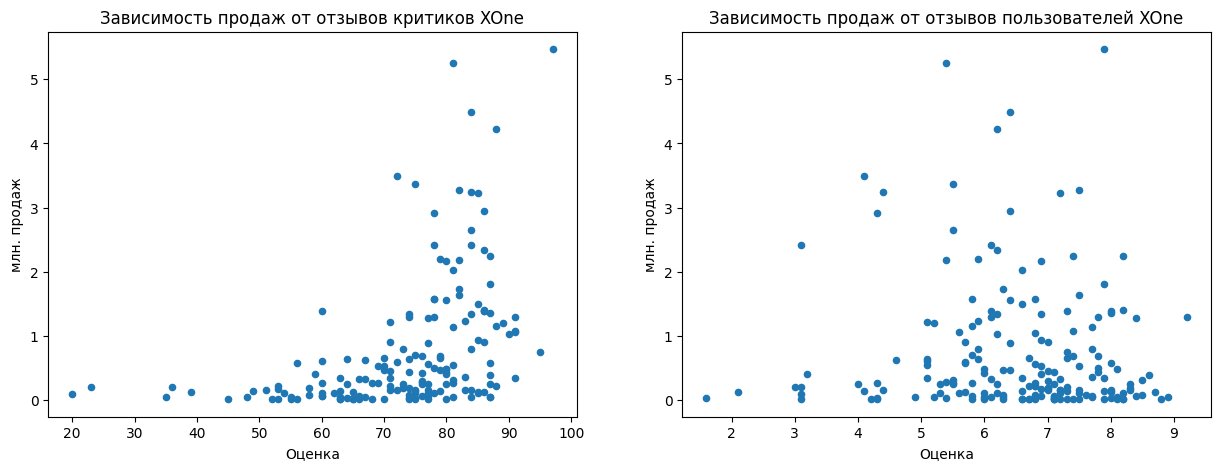

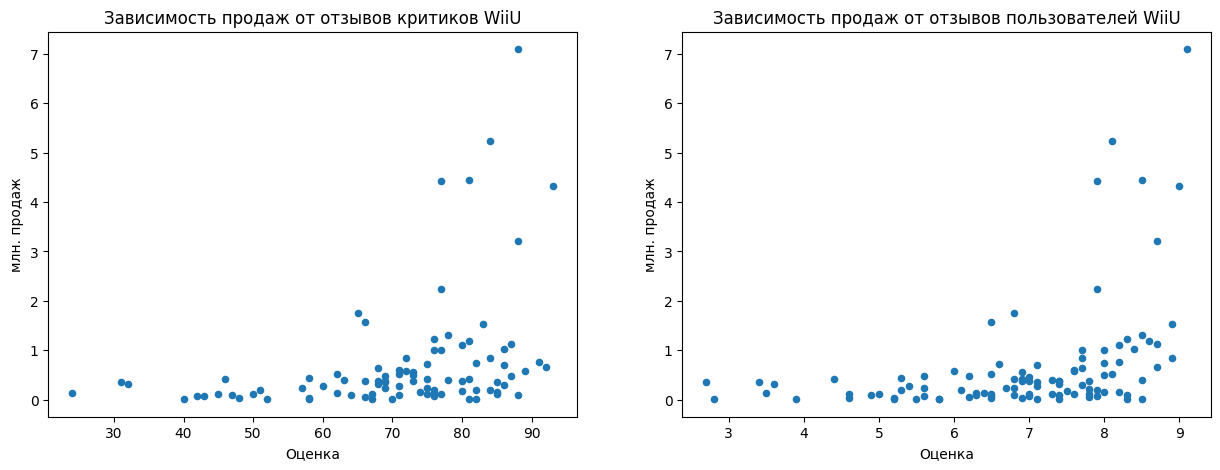

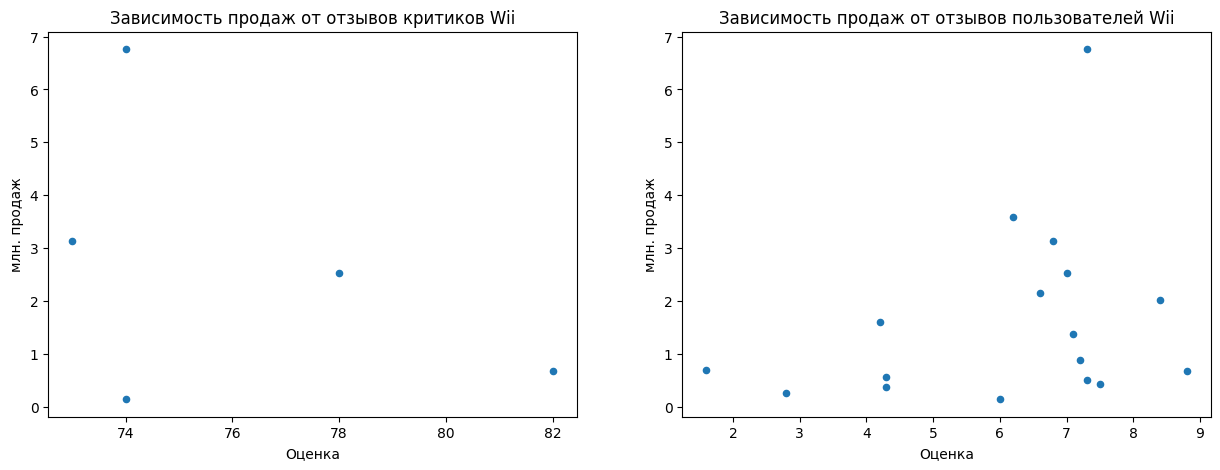

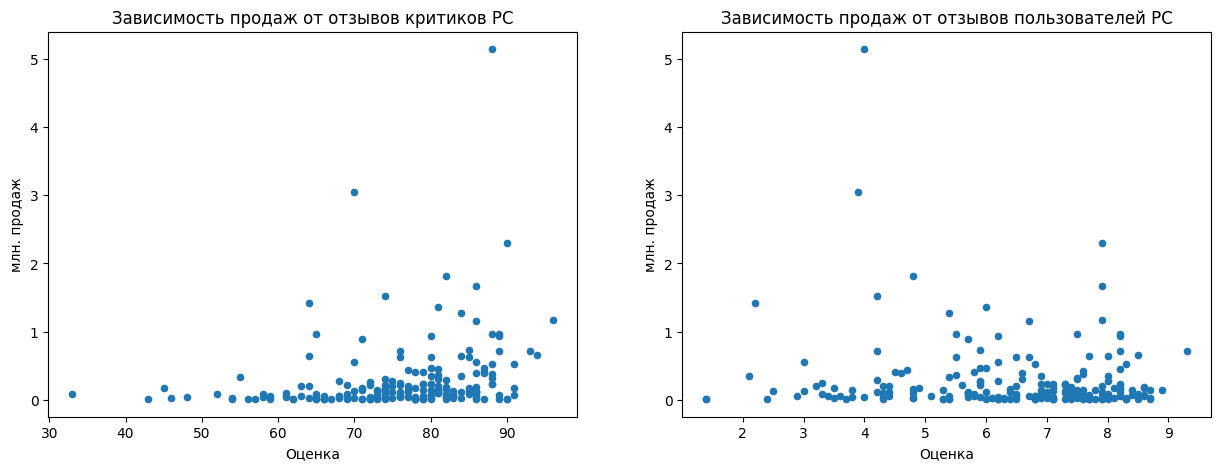

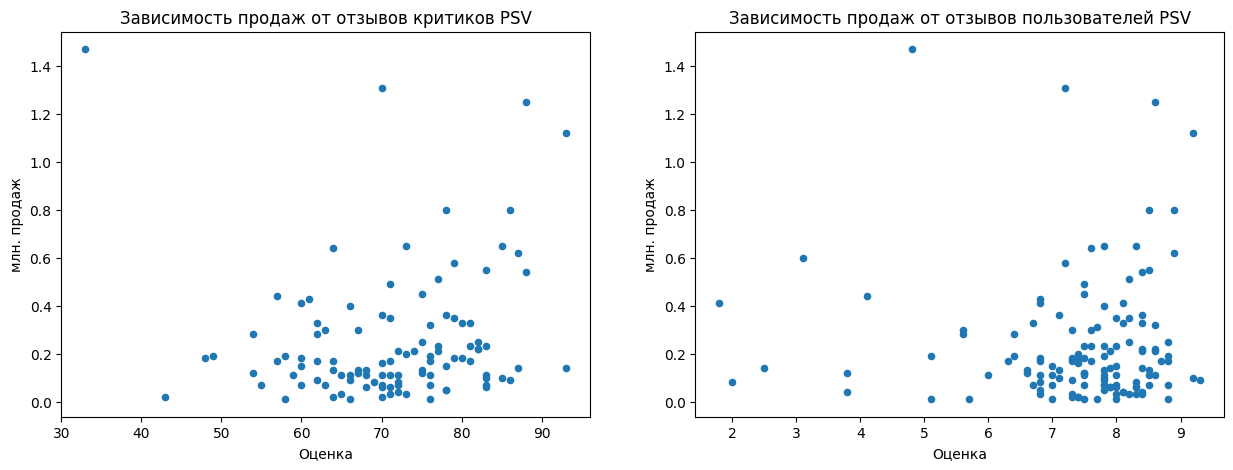

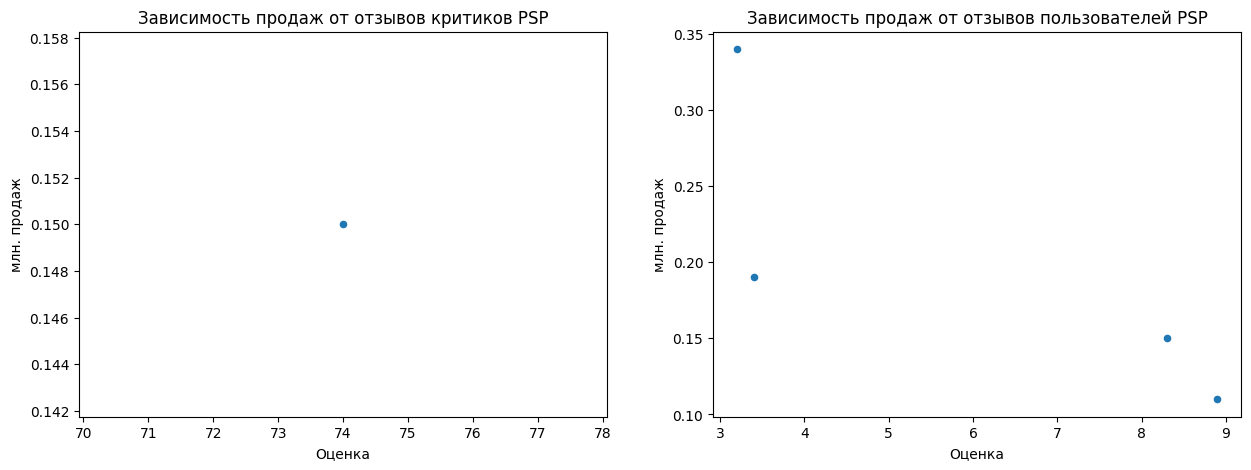

In [22]:
for platform in actual_data.platform.unique():
    platform_data = actual_data.query('platform == @platform')
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    platform_data.plot.scatter(x='critic_score', y='total_sales', ax=ax[0])\
        .set(title='Зависимость продаж от отзывов критиков ' + platform, xlabel='Оценка', ylabel='млн. продаж')
    platform_data.plot.scatter(x='user_score', y='total_sales', ax=ax[1])\
        .set(title='Зависимость продаж от отзывов пользователей ' + platform, xlabel='Оценка', ylabel='млн. продаж');

# Корреляционные матрицы для каждой платформы
actual_data.groupby(by='platform')[['critic_score', 'user_score', 'total_sales']].corr()

Полученные наблюдения подтвердились и для других платформ, причём у многих из них также отсутствует линейная связь между продажами и отзывами критиков.

### 3.4. <a id='toc3_4_'></a>[Распределение и прибыльность жанров](#toc0_)

Рассмотрим общее распределение игр по жанрам.

Доля игр в жанре экшн от общего числа: 0.35724185724185725


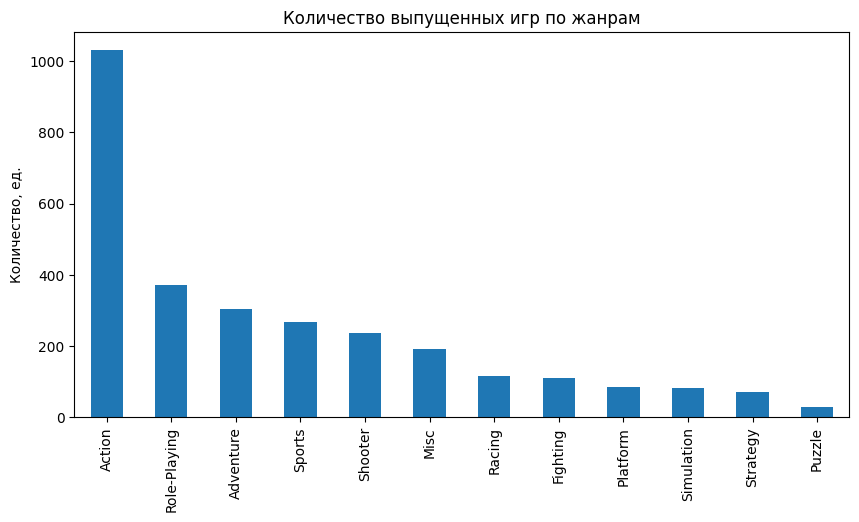

In [23]:
actual_data.genre.value_counts().plot(kind='bar', figsize=(10, 5))\
    .set(title='Количество выпущенных игр по жанрам', ylabel='Количество, ед.')

print('Доля игр в жанре экшн от общего числа:',\
    actual_data.query('genre == "Action"')['name'].count() / actual_data['name'].count())

Более трети всех игр - в жанре экшн. Также в топе следующие жанры: ролевые, приключения, спорт. Меньше всего выпускается головоломок.

Найдём самые прибыльные жанры, для этого найдём суммарные продажи и построим "ящик с усами" с продажами игр по жанрам.

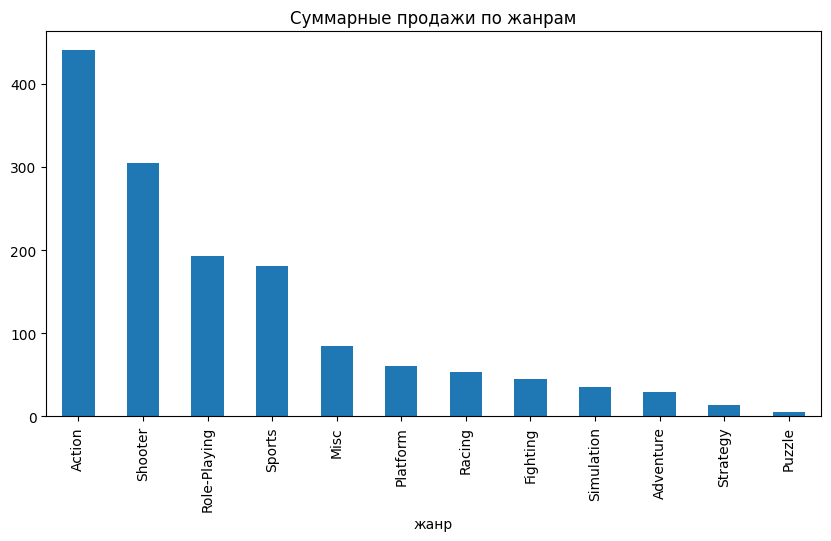

In [24]:
actual_data\
    .groupby('genre').total_sales.sum()\
    .sort_values(ascending=False)\
    .plot.bar(figsize=(10, 5), title='Суммарные продажи по жанрам', xlabel='жанр');

Text(0.5, 0.98, '')

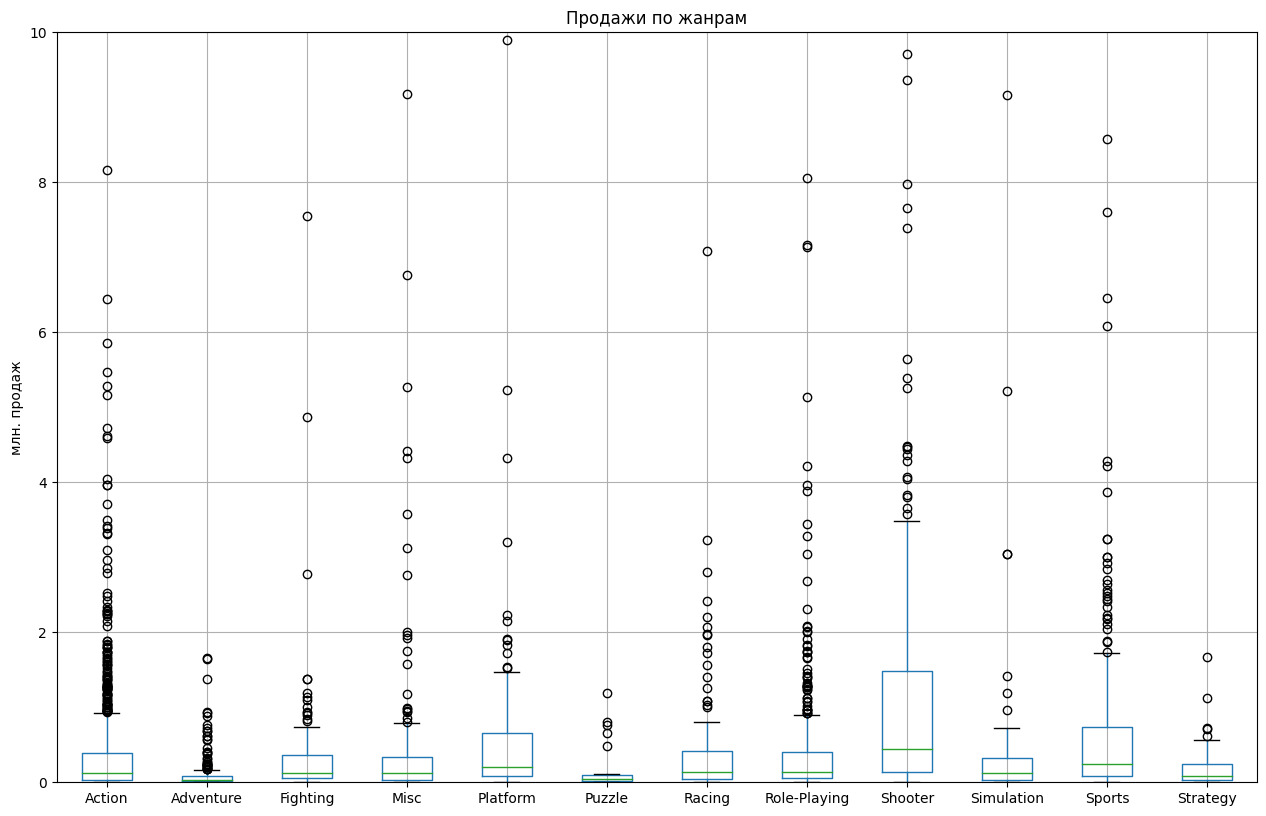

In [25]:
actual_data.boxplot(column='total_sales', by='genre', figsize=(15,10))\
    .set(title='Продажи по жанрам', ylabel='млн. продаж', xlabel='', ylim=(0, 10));
plt.suptitle('')

На графике видим, что чаще всего прибыльными играми становятся шутеры и платформеры, а реже всего - приключения и головоломки.

**Выводы по разделу 3:**

- На основе имеющихся данных выбран актуальный период времени, по которому может быть сделан прогноз на следующий год.
- На протяжении этого периода, который составляет 5 лет (2012-2016 гг.), игры выходили только на 11 платформах. Самые популярные - Wii, PS4, X360 и XOne, наименее популярные - PSP и PSV.
- Между продажами и отзывами критиков выявлена слабая связь, отзывы пользователей практически не влияют на продажи.
- Среди всех жанров по суммарным продажам и количеству выпущенных игр лидирует экшн, наименее популярны стратегии и головоломки.
- Больше всего прибыльных игр среди шутеров при их относительно небольшом количестве, также прибыльны платформеры и спортивные игры. Наименее прибыльный жанр - приключения, хотя таких игр выпускается довольно много.

## 4. <a id='toc4_'></a>[Портрет пользователя каждого региона](#toc0_)

В каждом регионе найдём самые популярные жанры и платформы, а также проверим связь продаж с рейтингом ESRB.

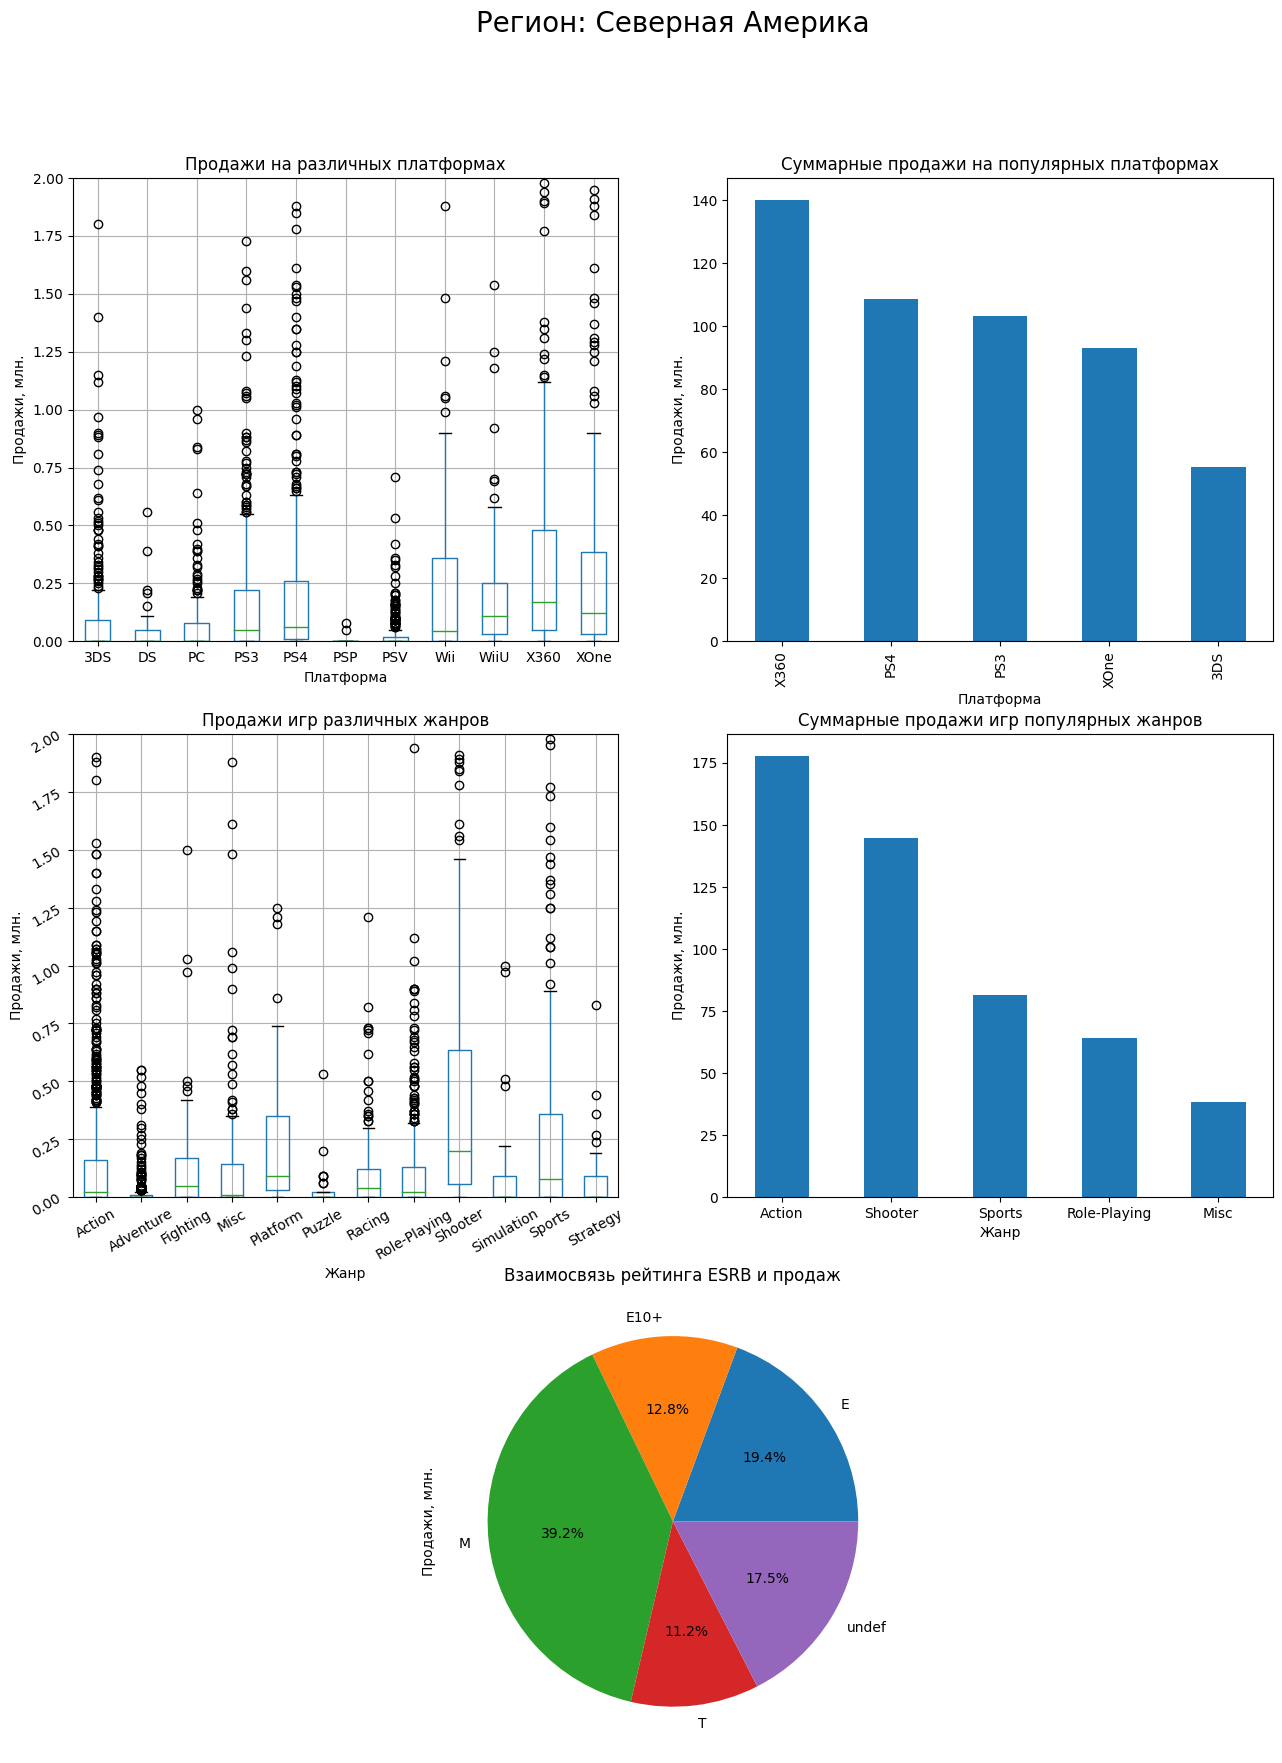

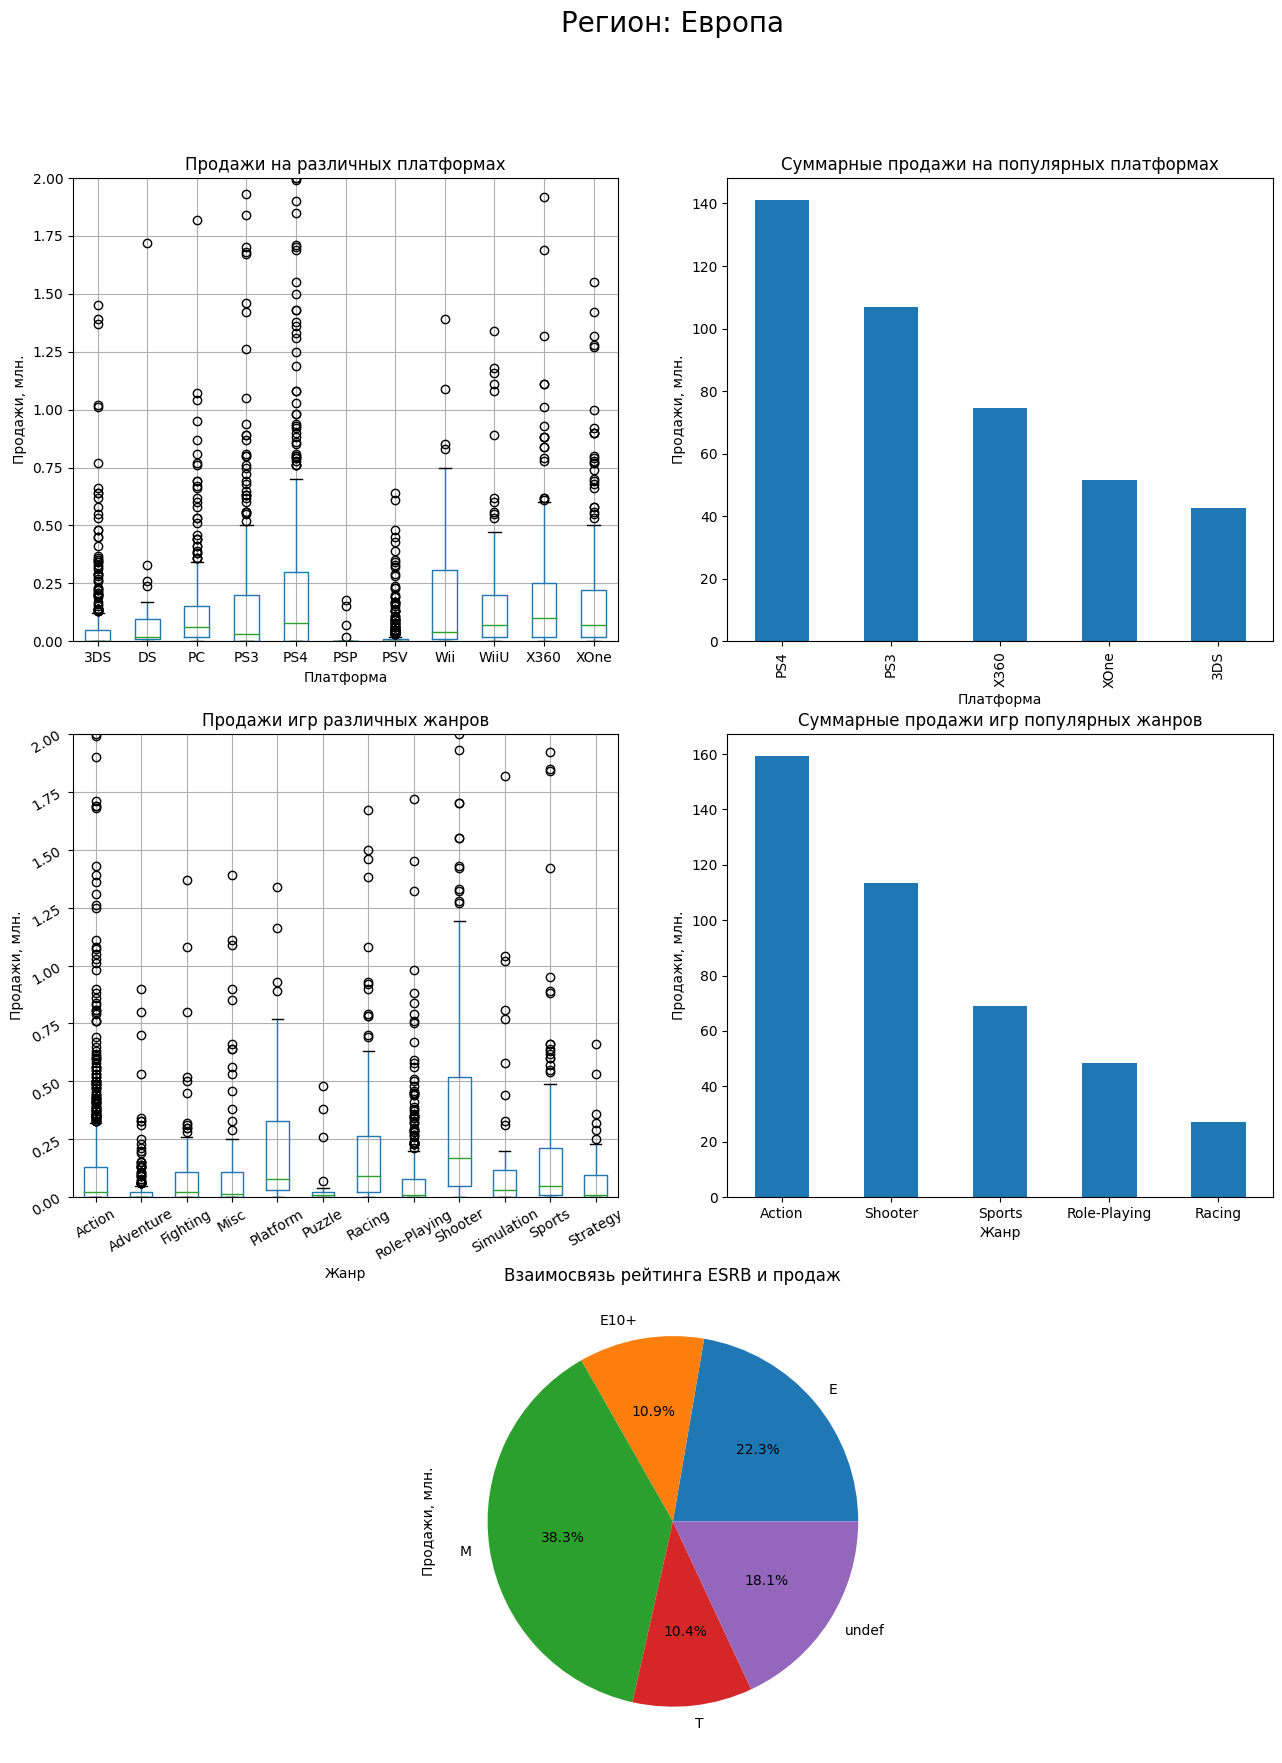

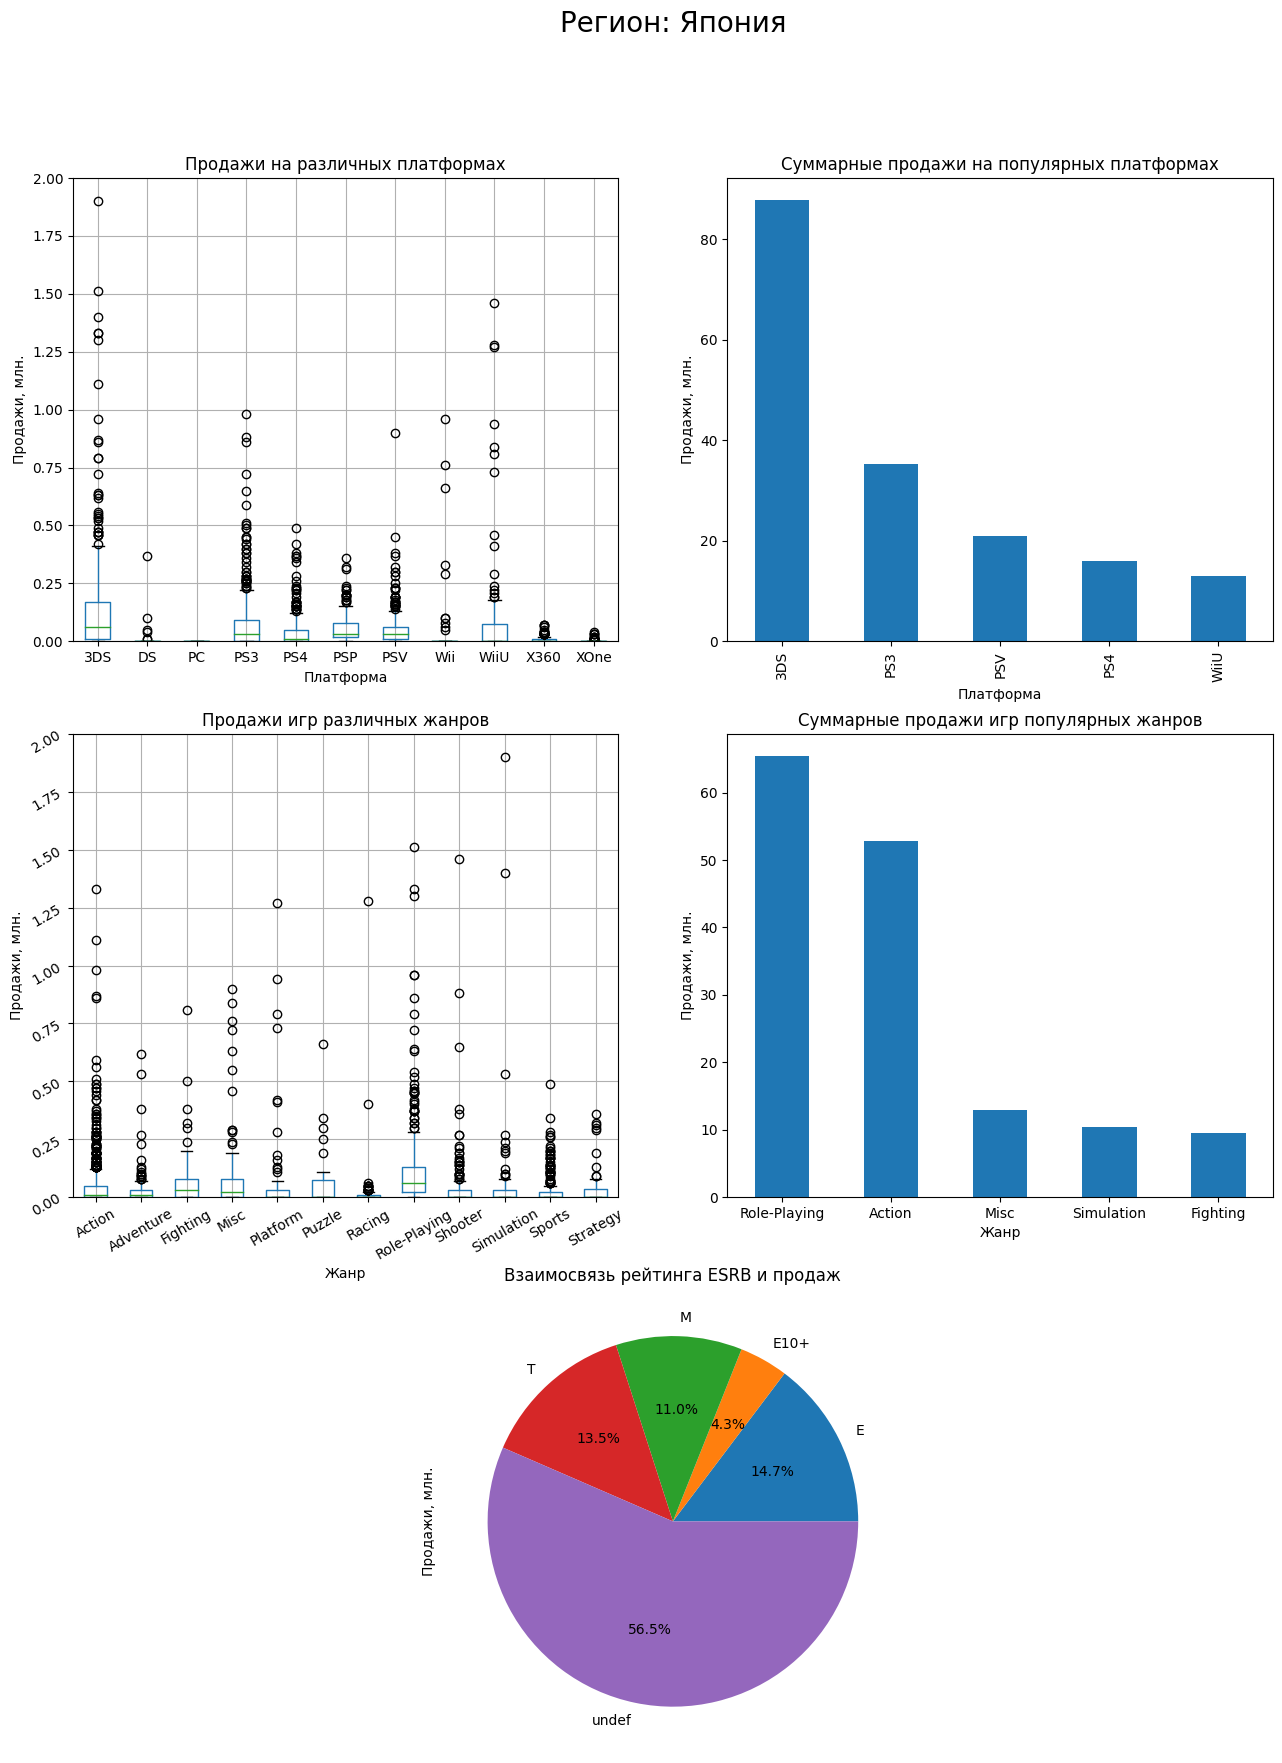

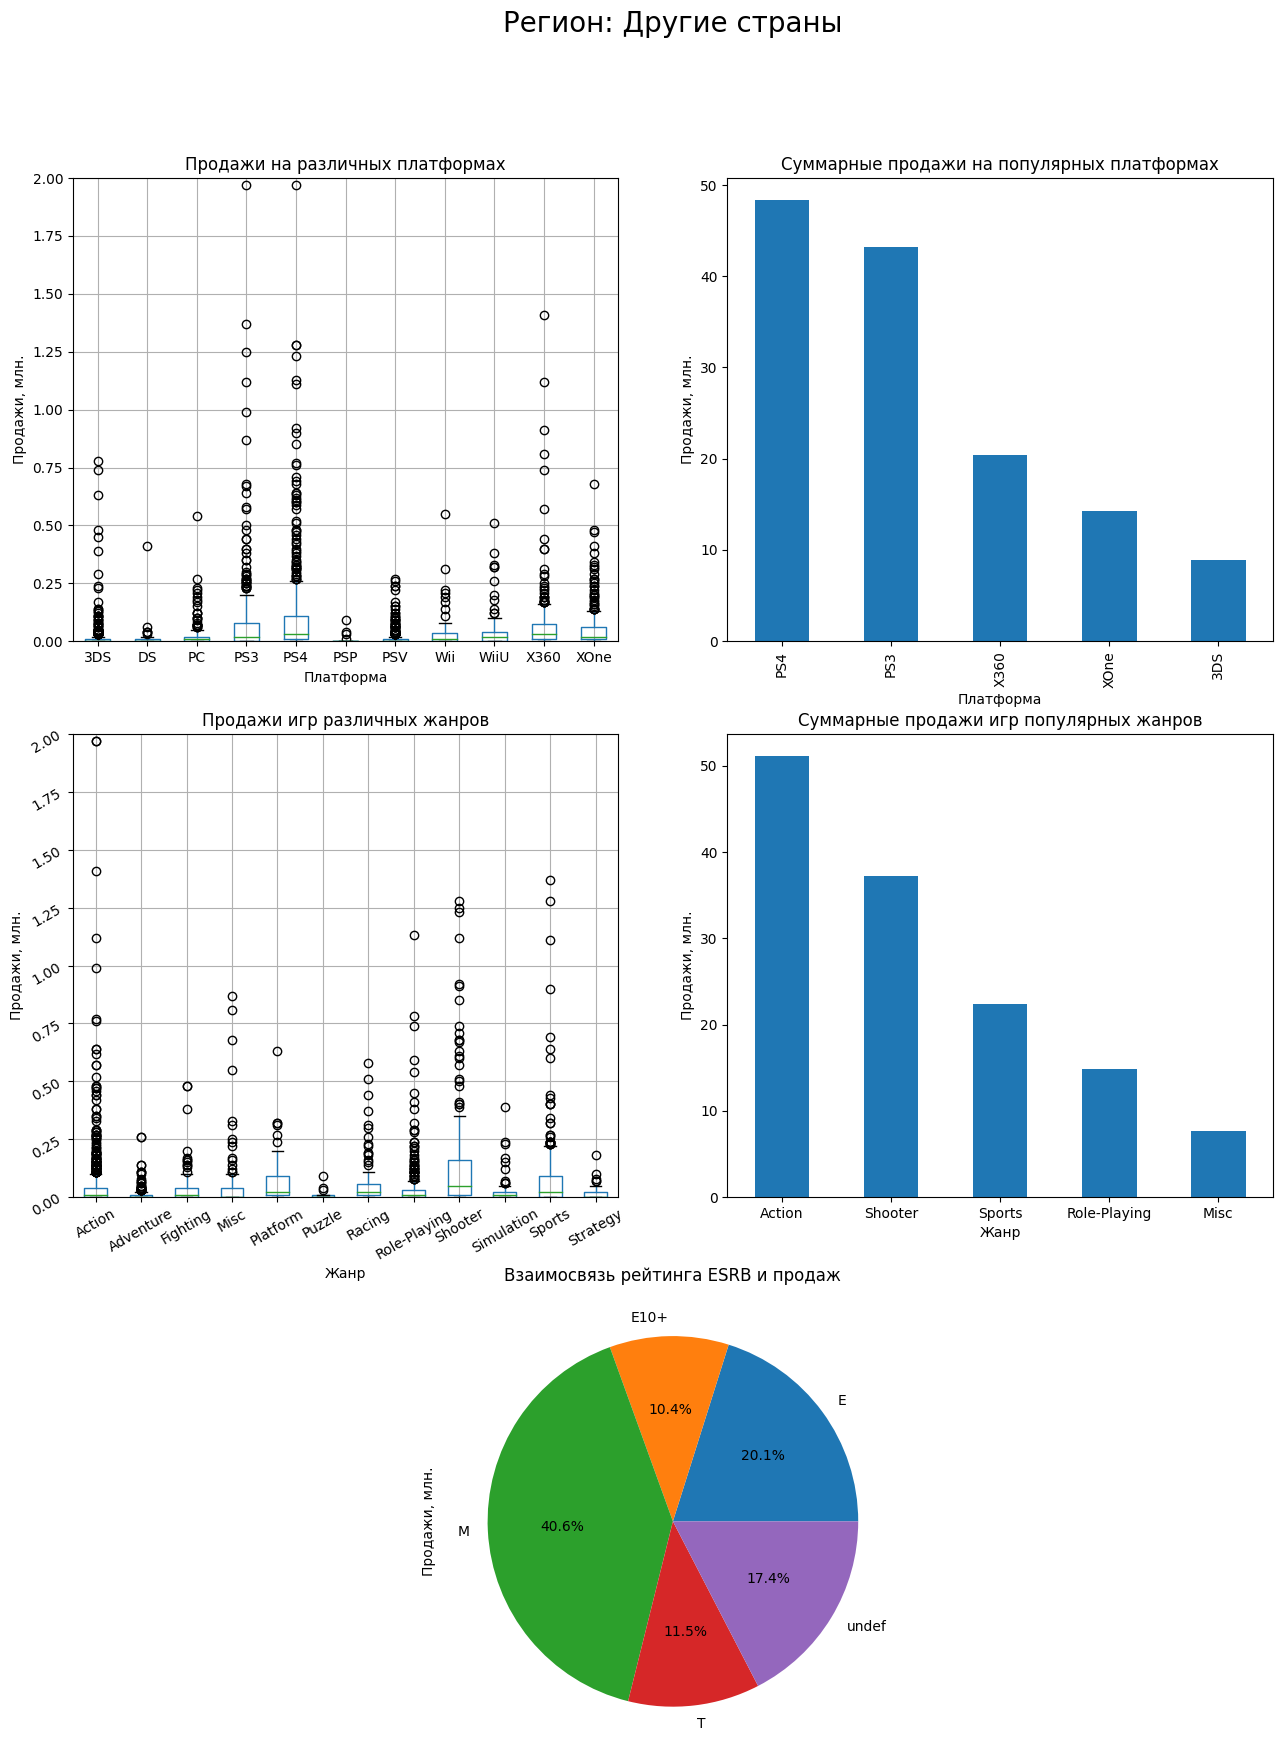

In [26]:
regions = ['Северная Америка', 'Европа', 'Япония', 'Другие страны']
columns = ['na_sales', 'eu_sales', 'jp_sales','other_sales']

for region_sales, region_name in zip(columns, regions):
    fig, ax = plt.subplot_mosaic([[1, 2], [3, 4], [5, 5]], figsize=(15, 21))
   
    # "Ящик с усами" продаж по платформам
    actual_data.boxplot(column=region_sales, by='platform', ax=ax[1])\
        .set(title='Продажи на различных платформах', ylabel='Продажи, млн.', xlabel='Платформа', ylim=(0, 2))
    
    # Самые популярные платформы
    actual_data.\
        pivot_table(index='platform', values=region_sales, aggfunc='sum')\
        .sort_values(by=region_sales, ascending=False).head().plot.bar(
            ax=ax[2], title='Суммарные продажи на популярных платформах',
            xlabel='Платформа', ylabel='Продажи, млн.', legend=False)
    
    # "Ящик с усами" продаж по жанрам
    actual_data.boxplot(column=region_sales, by='genre', ax=ax[3])\
        .set(title='Продажи игр различных жанров',
             xlabel='Жанр', ylabel='Продажи, млн.', ylim=(0, 2))
    ax[3].tick_params(labelrotation=30)
    
    # Самые популярные жанры
    actual_data\
        .pivot_table(index='genre', values=region_sales, aggfunc='sum')\
        .sort_values(by=region_sales, ascending=False).head().plot.bar(
            ax=ax[4], title='Суммарные продажи игр популярных жанров',
            xlabel='Жанр', ylabel='Продажи, млн.', legend=False)
    ax[4].tick_params(labelrotation=0)
    
    # Продажи игр в каждой категории рейтинга ESRB
    actual_data\
        .pivot_table(index='rating', values=region_sales, aggfunc='sum')[region_sales]\
        .plot.pie(ax=ax[5], autopct='%.1f%%')\
        .set(title='Взаимосвязь рейтинга ESRB и продаж', ylabel='Продажи, млн.')
    
    fig.suptitle('Регион: ' + region_name, fontsize=20)

**Выводы по разделу 4**

**Северная Америка:**
- Самые прибыльные игры - на платформе X360, также в топе Wii и XOne; при этом на PS3 и PS4 вышло большое количество игр, что привело к высоким суммарным продажам.
- Самый прибыльный жанр - шутеры, также популярны платформеры и спортивные игры; при этом много игр в жанре экшн и, как следствие, высокие суммарные продажи.
- Наибольшую прибыль имеют игры с ESRB рейтингом "М" (Для взрослых, 17+), продажи игр с рейтингом "Т" (подросткам, 13+) относительно невысокие; прибыль от игр с неопределённым рейтингом больше, чем от категорий "Е10+" (10 лет и старше) и "Е" (для всех, 0+).

**Европа:**
- Медиана продаж больше всего на платформах PS4 и X360, а самые большие суммарные продажи на PS4 и PS3.
- К прибыльным жанрам здесь относятся шутеры и платформеры, также в топ вошли гонки; крупнейшие суммарные продажи - экшн, шутеры, спортивные.
- Здесь популярны игры с рейтингом "М", наименьшие продажи - рейтинг "Т" и "Е10+"; прибыль от игр с неопределённым рейтингом составляет примерно пятую часть (около 18%).

**Япония:**
- Среди платформ лидирующие позиции по продажам занимает 3DS, значительно опережая конкурентов. Также относительно популярны приставки Sony: PS3, PS4, PSV, PSP.
- Самый популярный жанр здесь - ролевые игры, также высокие суммарные продажи в жанре экшн.
- Более половины прибыль здесь принесли игры, для которых неизвестен рейтинг ESRB, поэтому о зависимости продаж от категории судить сложно. Там, где рейтинг определён, наиболее популярны игры возрастных категорий "Е" и "Т", а игры "Е10+" имеют наименьшую прибыль.

**Другие страны:**
- Здесь наиболее прибыльны две платформы - PS3 и PS4, остальные сильно уступают по продажам.
- Популярнейший жанр - шутеры, также высокие продажи в жанре экшн.
- В этом регионе самая прибыльная категория - "М"; "Е" и "Е10+" наименее популярны; продажи игр без определённого рейтинга составляют около 17%.

## 5. <a id='toc5_'></a>[Проверка гипотез](#toc0_)

Проверим утверждение о равенстве средних двух выборок с помощью t-теста.

Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковы. Альтернативная - эти рейтинги не одинаковы.

Уровень значимости примем равным 0.05. Стоит отметить, нет оснований полагать, что дисперсии выборок отличаются.

In [27]:
import scipy.stats as st

In [28]:
alpha = 0.05

sample_xone = actual_data.query('platform == "XOne" and not user_score.isna()').user_score.tolist()
sample_pc = actual_data.query('platform == "PC" and not user_score.isna()').user_score.tolist()

results = st.ttest_ind(sample_xone, sample_pc)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-значение:  0.5535080500643661
Не удалось отвергнуть нулевую гипотезу.


Как видим, мы **можем** говорить о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Проверим другую гипотезу о равенстве средних двух выборок с помощью t-теста.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports совпадают. Альтернативная - эти рейтинги не одинаковы.

Уровень значимости тот же: 0.05. Здесь также нет оснований полагать, что дисперсии выборок отличаются.

In [29]:
alpha = 0.05

sample_action = actual_data.query('genre == "Action" and not user_score.isna()').user_score.tolist()
sample_sports = actual_data.query('genre == "Sports" and not user_score.isna()').user_score.tolist()

results = st.ttest_ind(sample_action, sample_sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-значение:  3.716308946093486e-26
Отвергаем нулевую гипотезу.


В данном случае вероятность совпадения средних рассматриваемых выборок ничтожна и нулевую гипотезу **отвергаем**.

<div class='alert alert-info'>
    
**Выводы по разделу 5:**

Гипотезу о равенстве средних пользовательских рейтингов платформ **Xbox One и PC отвергнуть не удалось**.

Можно с уверенность сказать, что cредние пользовательские рейтинги  жанров **Action и Sports не одинаковы**.
</div>

## 6. <a id='toc6_'></a>[Общий вывод](#toc0_)

- Выбран актуальный период времени, он составляет 5 лет (2012-2016 гг.). Самые популярные платформы - **Wii, PS4, X360 и XOne,** наименее популярные - **PSP и PSV**.
- Между продажами и отзывами критиков выявлена слабая связь, отзывы пользователей практически не влияют на продажи.
- Среди всех жанров по суммарным продажам и количеству выпущенных игр лидирует **экшн**, наименее популярны **стратегии и головоломки.**
- Больше всего прибыльных игр среди **шутеров** при их относительно небольшом количестве, также прибыльны **платформеры и спортивные игры**.
- Составлен портрет пользователя для четырёх регионов: в целом популярны платформы **Х360, PS3 и PS4,** а из жанров - шутеры, экшн, платформеры; игры в категориях **"М" (Для взрослых, 17+) и "Е" (для всех, 0+)**, как правило популярнее других.
- Япония кардинально отличается от других стран: здесь популярна платформа **3DS**, жанр **ролевые игры**, а сделать корректный вывод о связи возрастного рейтинга и продаж сделать не удалось (слишком много пропусков в рейтингах популярных игр - больше 50%).
- Средние пользовательские рейтинги платформ  жанров **Action и Sports не одинаковы**. Гипотезу о равенстве средних пользовательских рейтингов платформ **Xbox One и PC отвергнуть не удалось**.